In [106]:
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line
            qual = fh.readline().rstrip() # read the quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities


In [107]:

def reverseComplement(ar):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}
    t = ''
    for base in ar:
        t = complement[base] + t
    return t


In [108]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome



In [109]:

def naive_matching(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):
        match = True
        for j in range(len(p)):
            if t[i+j] != p[j]:
                match = False
                break
        if match:
            occurrences.append(i)

    return occurrences


def naive_matching_reverse_aware(p, t):
    occurrences = []
    for i in range(len(t) - len(p) + 1):
        match = True
        for j in range(len(p)):
            if t[i+j] != p[j]:
                match = False
                break
        if match:
            occurrences.append(i)
        reverse_match = True
        rev_p = reverseComplement(p)
        for j in range(len(rev_p)):
            if t[i+j] != rev_p[j]:
                reverse_match = False
                break
        if reverse_match and not match:
            occurrences.append(i)

    return occurrences

In [110]:

ten_as = 'AAAAAAAAAA'
t = ten_as + 'CCC' + ten_as + 'GGG' + ten_as

occurrences = naive_matching_reverse_aware('CCC', t)
print(occurrences)

t2 = ten_as + 'CGCG' + ten_as + 'CGCG' + ten_as
occurrences2 = naive_matching_reverse_aware('CGCG', t2)
print(occurrences2)

[10, 23]
[10, 24]


In [34]:
!wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

--2025-12-28 11:40:23--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.224.194.100, 13.224.194.85, 13.224.194.97, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.224.194.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49270 (48K) [application/octet-stream]
Saving to: ‘lambda_virus.fa.1’

lambda_virus.fa.1   100%[===================>]  48.12K  --.-KB/s    in 0.01s   

2025-12-28 11:40:23 (3.65 MB/s) - ‘lambda_virus.fa.1’ saved [49270/49270]



In [104]:
lambda_virus = readGenome('../homework_1/lambda_virus.fa')

In [111]:
aggt_occurences = naive_matching_reverse_aware('AGGT', lambda_virus)
len(aggt_occurences)

306

In [112]:
occurences = naive_matching_reverse_aware('TTAA', lambda_virus)
len(occurences)

195

In [113]:
occurrences3 = naive_matching_reverse_aware('ACTAAGT', lambda_virus)
print(occurrences3)

[26028, 27733, 45382]


In [114]:
occurrences4 = naive_matching_reverse_aware('AGTCGA', lambda_virus)
print(occurrences4)

[450, 1908, 2472, 18005, 23320, 33657, 41927, 44806, 45369]


In [115]:
def naive_2mm(p, t):
    occurrences = []
    max_mismatches = 2
    mismatches = 0
    for i in range(len(t) - len(p) + 1):
        match = True
        for j in range(len(p)):
            if t[i+j] != p[j]:
                mismatches += 1
            if mismatches > max_mismatches:
                match = False
                break
        if match:
            occurrences.append(i)
        mismatches = 0

    return occurrences


In [116]:
 naive_2mm('ACTTTA', 'ACTTACTTGATAAAGT')

[0, 4]

In [117]:
occurrences_2mm = naive_2mm('TTCAAGCC', lambda_virus)
len(occurrences_2mm)

191

In [118]:
occurrences_leftmost = naive_2mm('AGGAGGTT', lambda_virus)
min(occurrences_leftmost)

49

In [64]:
!wget  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq


--2025-12-28 11:59:44--  https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.224.194.123, 13.224.194.100, 13.224.194.97, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.224.194.123|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 241626 (236K) [application/octet-stream]
Saving to: ‘ERR037900_1.first1000.fastq’

ERR037900_1.first10 100%[===================>] 235.96K   788KB/s    in 0.3s    

2025-12-28 11:59:45 (788 KB/s) - ‘ERR037900_1.first1000.fastq’ saved [241626/241626]



In [119]:
err037900_sequences, err037900_qualities = readFastq('../homework_1/ERR037900_1.first1000.fastq')

In [72]:
def phred33ToQ(qual):
    return ord(qual) - 33

In [120]:
def createHist(qualities):
    # Create a histogram of quality scores
    hist = [0]*50
    badIndexes = [0]*100
    for qual in qualities:
        for i, phred in enumerate(qual):
            q = phred33ToQ(phred)
            hist[q] += 1
            if q < 3:
                badIndexes[i] += 1

    return hist, badIndexes


h, badIndexes = createHist(err037900_qualities)


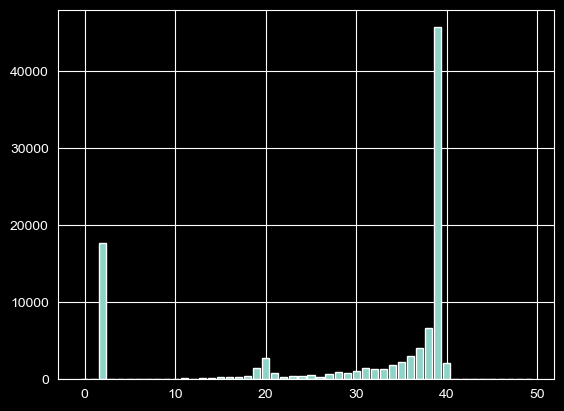

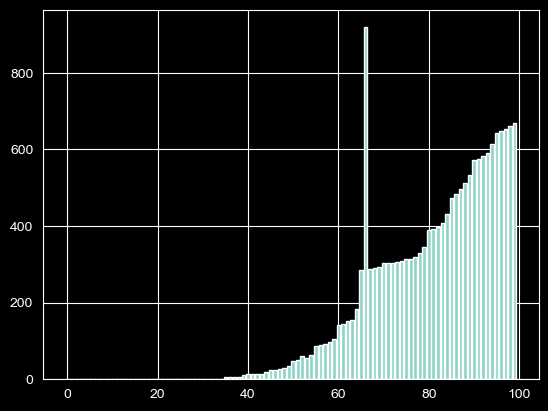

66


In [121]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(len(h)), h)
plt.show()

import matplotlib.pyplot as plt2
plt2.bar(range(0,100), badIndexes)
plt2.show()
maxBad = max(badIndexes)
indexOfBad = badIndexes.index(maxBad)
print(indexOfBad)